# Linear Regression using Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('ticks')
# %%
df = sns.load_dataset('tips')
X = df[['total_bill', 'size']].values
y = df.tip.values

## `sklearn` Model as Benchmark

In [3]:
# ===== BENCHMARK: SKLEARN REGRESSION =====
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

sklearn_benchmark = LinearRegression()
sklearn_benchmark.fit(X, y)
print(heading := "===== BENCHMARK: SKLEARN REGRESSION =====")
print(f"R^2 = {sklearn_benchmark.score(X, y)}")
print(f"MAE = {mean_absolute_error(y, sklearn_benchmark.predict(X))}")
print(f"Coeficients:\n{sklearn_benchmark.coef_}")
print(f"Intercept: {sklearn_benchmark.intercept_}")
print("=" * len(heading))

===== BENCHMARK: SKLEARN REGRESSION =====
R^2 = 0.46786930879612587
MAE = 0.7390035049097028
Coeficients:
[0.09271334 0.19259779]
Intercept: 0.6689447408125027


## Scratch Model

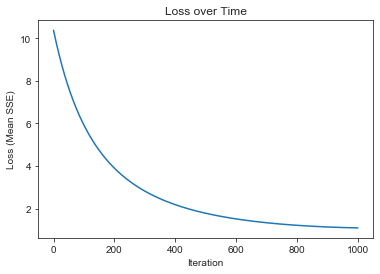

===== SCRATCH MODEL =====
R^2 = 0.43874703801599624
MAE = 0.7738108770295066
Coeficients:
[0.07096954 0.50155886]
Intercept: 0.43770563909922244


In [4]:
np.random.seed(1234)


class ScratchModel:

    def __init__(self) -> None:
        self.weights = None
        self.bias = None
        self.X = None
        self.y = None
        self.loss = []

    def sse(self) -> np.ndarray:
        """Calculates mean sum of squared errors (loss) over all training samples with current weights and bias"""
        preds = self.predict(self.X)
        return 1 / len(self.X) * np.sum((self.y - preds) ** 2)

    def derived_sse_wrt_weights(self) -> np.ndarray:
        """ Derivate of loss function with respect to weights"""
        return 2 / len(self.X) * np.sum(self.sse() * self.X)

    def derived_sse_wrt_bias(self) -> np.ndarray:
        """ Derivate of loss function with respect to bias"""
        return 2 / len(self.X) * np.sum(self.sse() * 1)

    def fit(self, X: np.ndarray, y: np.ndarray, n_iter: int = 1000, learning_rate: int = 0.000001):
        """Perform gradient descent on data X, y with `n_iter` iterations."""
        assert len(X) == len(y)

        # set params X and y
        self.X = X
        self.y = y

        # initialize weights and bias randomly
        self.weights = np.random.rand(self.X.shape[1])
        self.bias = np.random.rand()

        for _ in range(n_iter):
            # save loss for logging
            self.loss.append(self.sse())

            # calculate gradient w.r.t. weights (d/dw) and gradient w.r.t. bias (d/db)
            gradient_weights = self.derived_sse_wrt_weights()
            gradient_bias = self.derived_sse_wrt_bias()

            # update weights and biases
            self.weights -= learning_rate * gradient_weights
            self.bias -= learning_rate * gradient_bias

    def predict(self, X: np.ndarray):
        """Given the model is trained, predicts output on data X."""
        return X @ self.weights + self.bias


model = ScratchModel()
model.fit(X, y)
plt.plot(model.loss)
plt.title("Loss over Time")
plt.xlabel("Iteration")
plt.ylabel("Loss (Mean SSE)")
plt.show()

# %%
from sklearn.metrics import explained_variance_score

print(heading := "===== SCRATCH MODEL =====")
print(f"R^2 = {explained_variance_score(y, model.predict(X))}")
print(f"MAE = {mean_absolute_error(y, model.predict(X))}")
print(f"Coeficients:\n{model.weights}")
print(f"Intercept: {model.bias}")
print("=" * len(heading))